# Chapter 05 Logistic Regression

> 这里用到的脚本在章节目录的文件夹中都可以找到，就不再贴在此处了，只展示用法

Logistic regression是一种模拟某个类别或事件发生概率的线性回归方法，例如考试通过或失败、游戏输赢、生存或死亡等。
> https://en.wikipedia.org/wiki/Logistic_regression


## Logistic regression的特征

- 优点：计算代价不高，易于理解和实现
- 缺点：容易欠拟合，分类精度不高

# Sigmoid函数

一种实现Logistics回归分类器的方法是Sigmoid函数

${\displaystyle S(z)={\frac {1}{1+e^{-z}}}={\frac {e^{z}}{e^{z}+1}}=1-S(-z).}$

![Sigmoid function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png)

其中 `z` 为S函数的输入

${z=w^Tx=w_0x_0+w_1x_1+...+w_nx_n}$

我们可以在每个自变量前乘以一个回归系数，然后将其加和输入给S函数。而S函数的输出值在0-1之间，这就相当于给出了当前特征值的分类概率值，如果该值大于0.5，就分为1类；反之，分为0. 这是一种二分的Logistics回归分类器


# 基于最优化方法的最佳回归系数确定

对于最佳回归系数的确定，我们熟悉的是最小二乘法 `y=ax+b`。这里要给出的最优化方法是**梯度上升算法**。

## 梯度上升算法（Gradient Ascent）

> https://en.wikipedia.org/wiki/Gradient_descent

梯度上升算法是一种寻找局部最大值的方法。记梯度为 $\nabla$ ,则函数 ${f(x,y)}$ 的梯度为：

${\nabla f(x,y)= \bigl(\begin{smallmatrix} \frac{\partial f(x,y)}{\partial x} \\ \frac{\partial f(x,y)}{\partial y} \end{smallmatrix} \bigr)}$


> 这个梯度意味着要沿x的方向移动 ${\frac{\partial f(x,y)}{\partial x}}$ , 沿y的方向移动 ${\frac{\partial f(x,y)}{\partial y}}$ 
> 
> 梯度上升算法的迭代公式为： ${w:=w+a\nabla_w f(w)}$
> 
> 另一种常见的最优化方法是**梯度下降算法（Gradient Descent）**，用于寻找局部最小值，计算公式为：${w:=w-a\nabla_w f(w)}$


## 训练算法：使用梯度上升找最佳参数

假设有100个数据点，每个点具有两个数值型特征：X1和X2.

在python中通过 `loadDataSet()` 读入数据与数据点的标签。

这里的数据来源于书中的'testSet.txt'，其中前两列为特征值，第三列为标签。

![testSet](img/img1.png)

```python
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

```

使用 `gradAscent()` 函数，通过梯度上升法获得特征值的回归系数


In [1]:
import logRegres
dataArr, labelMat = logRegres.loadDataSet()
logRegres.gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

`gradAscent()` 函数返回三个值，第一个为截距 `β_0` 的值，后两个为两个特征的回归系数。

通过上述回归系数，使用 `plotBestFit()` 函数画出拟合直线

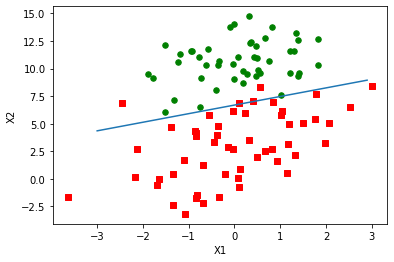

In [2]:
from importlib import reload
from numpy import *
reload(logRegres)
weights = logRegres.gradAscent(dataArr, labelMat)
logRegres.plotBestFit(weights.getA())

通过上图我们可以看出，梯度上升法很好地拟合了回归系数，只有2-4个点被错分。但是这种方法需要大量的运算，每个特征值我们都进行了100次的乘法运算（这里是300次）。如果我们有一个m个特征值n个数据点的数据集的话，我们就需要运算$m*n$次。因此我们需要一种更少消耗计算资源的方法。

## 训练算法：随机梯度上升（Stochastic Gradient Ascent）

随机梯度上升算法每次只用一个样本点更新回归系数。针对上面的例子我们只需要迭代100次，就可以拟合回归系数。

> ![](img/img2.png)

运行 `stocGradAscent0()` 获得回归方程的系数，这里要注意原代码在python3会报错：

`TypeError: can't multiply sequence by non-int of type 'numpy.float64'`

需要将62行的 `weights = weights + alpha * error * dataMatrix[i]` 
替换为 `weights = weights + alpha * error * array(dataMatrix[i])`


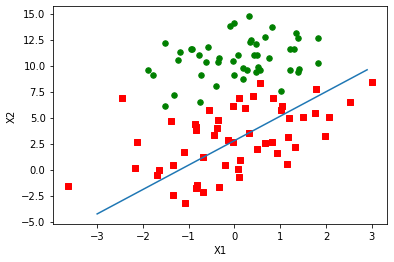

In [22]:
reload(logRegres)
weights = logRegres.stocGradAscent0(dataArr, labelMat)
logRegres.plotBestFit(weights)

虽然随机梯度上升算法迭代次数少，但分类精度也差了。这可以通过增加迭代次数优化。

以下使用 `stocGradAscent1()` 获得回归方程的系数，该函数可以更改迭代次数，同时步长 `alpha` 也会随着迭代次数增加而减小。


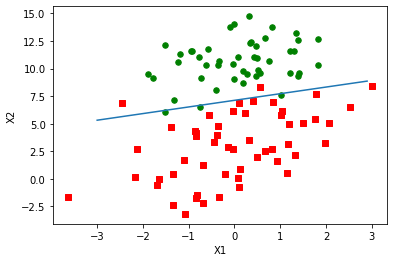

In [26]:
reload(logRegres)
weights = logRegres.stocGradAscent1(dataArr, labelMat,150)
logRegres.plotBestFit(weights)

通过优化随机梯度上升算法，我们实现了和梯度上升算法差不多的分类精度，而且只用了150次迭代就完成了计算。

# 示例：从疝气病症预测病马的死亡率

工作流程：
1. 收集数据：给定数据文件 `horseColicTraining.txt`, `horseColicTest.txt`
2. 准备数据：解析文本文件并填充缺失值
3. 分析数据：可视化数据
4. 训练算法：使用最优化算法，找到最佳系数
5. 测试算法：为了量化回归的效果，可以观察错误率。根据错误率决定是否重新训练，通过改变迭代的次数和步长等参数来得到更好的回归系数。
6. 使用算法：输入新的特征值进行分类

书中已经给了可用的数据 `horseColicTraining.txt`, `horseColicTest.txt`，我们使用 `colicTest()` 函数即可，


In [27]:
reload(logRegres)
logRegres.colicTest()

D:\jupyterNote\machinelearninginaction\ch05\logRegres.py:18: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+exp(-inX))


the error rate of this test is: 0.313433


0.31343283582089554

`multiTest()` 函数进行10次测试并求错误率的平均值

In [28]:
logRegres.multiTest()

D:\jupyterNote\machinelearninginaction\ch05\logRegres.py:18: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+exp(-inX))


the error rate of this test is: 0.373134
the error rate of this test is: 0.388060
the error rate of this test is: 0.343284
the error rate of this test is: 0.432836
the error rate of this test is: 0.358209
the error rate of this test is: 0.313433
the error rate of this test is: 0.313433
the error rate of this test is: 0.313433
the error rate of this test is: 0.373134
the error rate of this test is: 0.268657
after 10 iterations the average error rate is: 0.347761


这里给出warning `RuntimeWarning: overflow encountered in exp return 1.0/(1+exp(-inX))` 可以忽略
https://www.statology.org/runtimewarning-overflow-encountered-in-exp/

# 小结

Logistic regression的目的在于寻找一个非线性函数Sigmoid的最佳拟合参数，求解过程可以由最优化算法完成，例如随机梯度上升算法。